In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pymap3d as pm

In [4]:
bagall = "all"
bagrange = "range"
bagrangeerr = "range_beacon_error"
bagallerr = "all_beacon_error"
bagimu = "imu_range"

In [2]:
def plot_traj(in_bag):
    bag  = in_bag
    lat0 = 40.905000 # deg
    lon0 = 12.959967 # deg
    h0   = 0.0     # meters
    
    init   = pm.geodetic2ned(40.904522, 12.961190, 0, lat0, lon0, h0)
    anch_1 = pm.geodetic2ned(40.90419, 12.96163, 0, lat0, lon0, h0)
    anch_2 = pm.geodetic2ned(40.9041, 12.96131, 0, lat0, lon0, h0)
    anch_3 = pm.geodetic2ned(40.90445, 12.96101, 0, lat0, lon0, h0)
    anch_4 = pm.geodetic2ned(40.90472, 12.96118, 0, lat0, lon0, h0)
    
    #################################################################################
    
    data_state = pd.read_csv("../bagfiles/"+bag+"_state.csv")
    data_gps = pd.read_csv("../bagfiles/"+bag+"_gps.csv")
    data_range = pd.read_csv("../bagfiles/"+bag+"_range.csv")
    
    #################################################################################
    
    x = []
    y = []
    
    state_num = data_state[ ["field.position.latitude", "field.position.longitude", "field.position.altitude"] ].to_numpy()
    for state in state_num:
        n, e, d = pm.geodetic2ned(state[0], state[1], 0, lat0, lon0, h0)
        x.append(e)
        y.append(n)
    x = np.array(x)
    y = np.array(y)
    
    #################################################################################
    
    xt = []
    yt = []
    
    state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
    for gps in state_num:
        n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
        xt.append(e)
        yt.append(n)
    xt = np.array(xt)
    yt = np.array(yt)
    
    #################################################################################
    
    t_gps       = np.array(data_gps["%time"])
    t_ran       = np.array(data_range["%time"])
    t_st        = np.array(data_state["%time"])
    
    idx = []
    for t_i in t_gps:
        idx.append(np.abs(t_st-t_i).argmin())
    idx_ran = []
    for t_i in t_ran:
        idx_ran.append(np.abs(t_st-t_i).argmin())
    idx = np.array(idx)
    idx_ran = np.array(idx_ran)
    
    #################################################################################
    
    plt.cla()
    # Plot figure with subplots of different sizes
    fig = plt.figure(1)
    # set up subplot grid
    gridspec.GridSpec(4,4)
    
    # LARGE SUBPLOT
    plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
    plt.title('GPS vs estimated trajectory')
    plt.xlabel('East [m]')
    plt.ylabel('North [m]')
    
    # Filter Estimate
    plt.plot(x,y, c='darkviolet')
    plt.scatter(x,y, c='darkviolet', marker='x', s=30, linewidth=0.2, label="Filter Estimate")
    
    # Gps
    plt.plot(xt,yt, c="darkorange", linewidth=1.5, label="GPS position")
    
    plt.annotate(text="START", xy=(xt[0], yt[0]), xytext=(xt[0]+20, yt[0]), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    plt.annotate(text="END", xy=(xt[-1], yt[-1]), xytext=(xt[-1]+8, yt[-1]+10), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    
    # Anchors
    plt.scatter([anch_1[1], anch_2[1], anch_3[1], anch_4[1] ],
                [anch_1[0], anch_2[0], anch_3[0], anch_4[0] ], s=100, facecolors='none', marker='s', edgecolors='red', label='anchors')
    plt.text(anch_1[1], anch_1[0], "  1")
    plt.text(anch_2[1], anch_2[0], "  2")
    plt.text(anch_3[1], anch_3[0], "  3")
    plt.text(anch_4[1], anch_4[0], "  4")
    
    # Ranges
    plt.scatter(x[idx_ran], y[idx_ran],facecolors='none', marker='s', s=90, edgecolors='green', label='Range update')
    plt.legend(fontsize='small')
    
    # TOP SMALL PLOT
    t = (t_st - t_st[0])/10**(7)
    plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
    plt.plot(t[idx], x[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
    plt.plot(t[idx], xt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.legend(fontsize='small')
    plt.title('East trajectory')
    plt.ylabel('East [m]')
    plt.xlabel('Time [s]')
    
    #BOTTOM SMALL PLOT  
    plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)
    plt.plot(t[idx], y[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
    plt.plot(t[idx], yt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.title('North trajectory')
    plt.ylabel('North [m]')
    plt.xlabel('Time [s]')
    plt.legend(fontsize='small')
    
    fig.tight_layout(h_pad=0, w_pad=0)
    fig.set_size_inches(w=11,h=7)
    #fig.savefig("plots/"+bag+"")
        
    plt.show()

In [26]:
def plot_err(in_bag):
    bag  = in_bag
    lat0 = 40.905000 # deg
    lon0 = 12.959967 # deg
    h0   = 0.0     # meters
    
    init   = pm.geodetic2ned(40.904522, 12.961190, 0, lat0, lon0, h0)
    anch_1 = pm.geodetic2ned(40.90419, 12.96163, 0, lat0, lon0, h0)
    anch_2 = pm.geodetic2ned(40.9041, 12.96131, 0, lat0, lon0, h0)
    anch_3 = pm.geodetic2ned(40.90445, 12.96101, 0, lat0, lon0, h0)
    anch_4 = pm.geodetic2ned(40.90472, 12.96118, 0, lat0, lon0, h0)
    
    #################################################################################
    
    data_state = pd.read_csv("../bagfiles/"+bag+"_state.csv")
    data_gps = pd.read_csv("../bagfiles/"+bag+"_gps.csv")
    data_range = pd.read_csv("../bagfiles/"+bag+"_range.csv")
    
    #################################################################################
    
    x = []
    y = []
    
    state_num = data_state[ ["field.position.latitude", "field.position.longitude", "field.position.altitude"] ].to_numpy()
    for state in state_num:
        n, e, d = pm.geodetic2ned(state[0], state[1], 0, lat0, lon0, h0)
        x.append(e)
        y.append(n)
    x = np.array(x)
    y = np.array(y)
    
    #################################################################################
    
    xt = []
    yt = []
    
    state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
    for gps in state_num:
        n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
        xt.append(e)
        yt.append(n)
    xt = np.array(xt)
    yt = np.array(yt)
    
    #################################################################################
    
    t_gps       = np.array(data_gps["%time"])
    t_ran       = np.array(data_range["%time"])
    t_st        = np.array(data_state["%time"])
    
    idx = []
    for t_i in t_gps:
        idx.append(np.abs(t_st-t_i).argmin())
    idx_ran = []
    for t_i in t_ran:
        idx_ran.append(np.abs(t_st-t_i).argmin())
    idx = np.array(idx)
    idx_ran = np.array(idx_ran)
    
    #################################################################################
    
    plt.cla()
    # Plot figure with subplots of different sizes
    fig = plt.figure(1)
    # set up subplot grid
    gridspec.GridSpec(4,4)
    
    # LARGE SUBPLOT
    plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
    plt.title('GPS vs estimated trajectory. Error = ' + str(np.mean(np.linalg.norm([xt - x[idx], yt - y[idx]], axis=0))))
    plt.xlabel('East [m]')
    plt.ylabel('North [m]')
    
    # Filter Estimate
    plt.plot(x,y, c='darkviolet')
    plt.scatter(x,y, c='darkviolet', marker='x', s=30, linewidth=0.2, label="Filter Estimate")
    
    # Gps
    plt.plot(xt,yt, c="darkorange", linewidth=1.5, label="GPS position")
    
    plt.annotate(text="START", xy=(xt[0], yt[0]), xytext=(xt[0]+20, yt[0]), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    plt.annotate(text="END", xy=(xt[-1], yt[-1]), xytext=(xt[-1]+8, yt[-1]+10), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
    
    # Anchors
    plt.scatter([anch_1[1], anch_2[1], anch_3[1], anch_4[1] ],
                [anch_1[0], anch_2[0], anch_3[0], anch_4[0] ], s=100, facecolors='none', marker='s', edgecolors='red', label='anchors')
    plt.text(anch_1[1], anch_1[0], "  1")
    plt.text(anch_2[1], anch_2[0], "  2")
    plt.text(anch_3[1], anch_3[0], "  3")
    plt.text(anch_4[1], anch_4[0], "  4")
    
    # Ranges
    plt.scatter(x[idx_ran], y[idx_ran],facecolors='none', marker='s', s=90, edgecolors='green', label='Range update')
    plt.legend(fontsize='small')
    
    # TOP SMALL PLOT
    t = (t_st - t_st[0])/10**(7)
    plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
    plt.plot(t[idx], xt - x[idx],  c='darkviolet', linewidth=1, label="East Error")
    plt.plot(t[idx], yt - y[idx],  c='red', linewidth=1, label="North Error")
    #plt.plot(t[idx], xt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
    plt.legend(fontsize='small')
    plt.title('Error')
    plt.ylabel('Error [m]')
    plt.xlabel('Time [s]')
    
    #BOTTOM SMALL PLOT
    plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)

    plt.plot(t[idx], xt, linewidth=1.5, c='orange', alpha=0.7, label='GPS North position')
    plt.plot(t[idx], x[idx],  c='darkviolet', linewidth=1.5, label="Filter North Estimate")
      
    plt.plot(t[idx], yt, linewidth=1.5, c='red', alpha=0.7, label='GPS East position')
    plt.plot(t[idx], y[idx],  c='darkblue', linewidth=1.5, label="Filter East Estimate")
    plt.title('North and East trajectories')
    plt.legend(fontsize='x-small')
    plt.ylabel('Trajectories [m]')
    plt.xlabel('Time [s]')
    
    fig.tight_layout(h_pad=0, w_pad=0)
    fig.set_size_inches(w=11,h=7)
    plt.savefig(in_bag)
        
    plt.show()


    metrics = {
        "Min-err East [x]"  : np.min(xt - x[idx]),
        "Max-err East [x]"  : np.max(xt - x[idx]),
        "Mean-err East [x]" : np.mean(xt - x[idx]),
        "Min-err North [y]"  : np.min(yt - y[idx]),
        "Max-err North [y]"  : np.max(yt - y[idx]),
        "Mean-err North [y]" : np.mean(yt - y[idx]),
        "Mean-err abs East [y]" : np.mean(np.abs(yt - y[idx])),
        "Mean-err abs North [y]" : np.mean(np.abs(xt - x[idx])),
        "Mean-err Overall" : np.mean(np.linalg.norm([xt - x[idx], yt - y[idx]], axis=0))
    }
    errors = (xt - x[idx], yt - y[idx])

    return metrics, errors

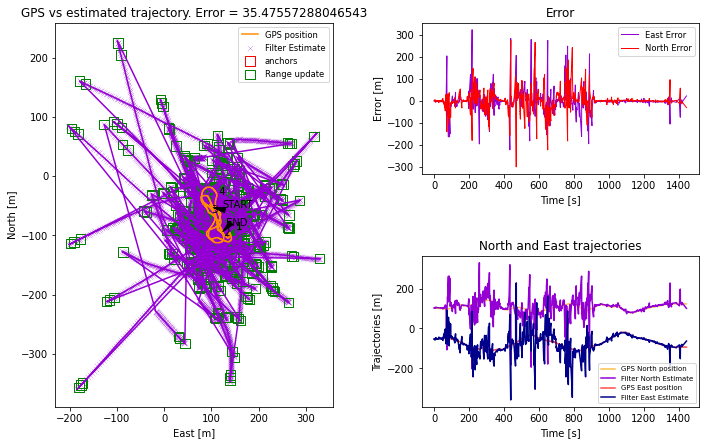

In [49]:
#error_metrics_bagall, data_all = plot_err(bagall)
error_metrics_range, data_imu = plot_err("imu_range_thr_3_beac_[1,2,3,4]")

In [151]:
#north_east_err_all = np.array(
#        [data_all[0],
#        data_all[1]]
#    ).reshape( (len(data_all[0]), 2) )

north_east_err_imu = np.array(
        [data_imu[0],
        data_imu[1]]
    ).reshape( (len(data_imu[0]), 2) )

north_east_err_range = np.array(
        [data_range[0],
        data_range[1]]
    ).reshape( (len(data_range[0]), 2) )

In [152]:
#df_all = pd.DataFrame(north_east_err_all, columns = ['EastAll','NorthAll'])
df_imu = pd.DataFrame(north_east_err_imu, columns = ['EastImu','NorthImu'])
df_range = pd.DataFrame(north_east_err_range, columns = ['EastRange','NorthRange'])

#df_conc = pd.concat([df_all, df_range], axis=1)
df_conc = pd.concat([df_imu, df_range], axis=1)

In [196]:
rolling_interval = 50

#roll_means_east_all = []
#roll_means_north_all = []

roll_means_east_imu = []
roll_means_north_imu = []

roll_means_east_range = []
roll_means_north_range = []
for i in range(len(df_conc['EastRange']) ):
    if i%rolling_interval == 0:
        #roll_means_east_all.append(df_conc['EastAll'][i:i+rolling_interval].mean() ) 
        #roll_means_north_all.append(df_conc['NorthAll'][i:i+rolling_interval].mean() ) 

        roll_means_east_imu.append(df_conc['EastImu'][i:i+rolling_interval].mean() ) 
        roll_means_north_imu.append(df_conc['NorthImu'][i:i+rolling_interval].mean() )

        roll_means_east_range.append(df_conc['EastRange'][i:i+rolling_interval].mean() ) 
        roll_means_north_range.append(df_conc['NorthRange'][i:i+rolling_interval].mean() )

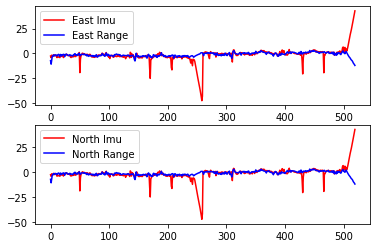

In [198]:
labels  = ["East Imu", "East Range", "North Imu", "North Range"]
colors  = ["r","b"]
datas   = [roll_means_east_imu, roll_means_east_range, roll_means_north_imu, roll_means_north_range]

f,axs = plt.subplots(2, sharex=False, sharey=False)

for i,ax in enumerate(axs):
  axs[i].plot(datas[i*2],color=colors[0],label=labels[i*2])
  axs[i].plot(datas[i*2+1],color=colors[1],label=labels[i*2+1])
  axs[i].legend()

plt.show()

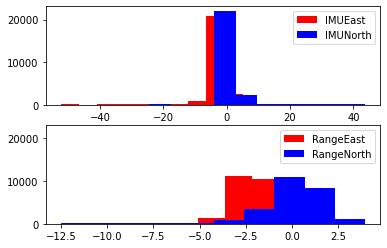

In [182]:
labels  = ["IMUEast", "IMUNorth","RangeEast", "RangeNorth"]
colors  = ["r","b"]
datas   = [data_imu, data_range]

f,axs = plt.subplots(2, sharex=False, sharey=True)

for i,ax in enumerate(axs):
  axs[i].hist(datas[i][0],color=colors[0],label=labels[i*2])
  axs[i].hist(datas[i][1],color=colors[1],label=labels[i*2+1])
  axs[i].legend()

plt.show()